In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [35]:
import pandas as pd
from pymongo import MongoClient

# Menghubungkan ke server MongoDB (secara lokal)
client = MongoClient('localhost', 27017)
db = client['google_play_store_data']
collection = db['04. label_data_bibit'] 

# Mengambil semua dokumen dalam koleksi
cursor = collection.find()

# Mengonversi data ke dalam bentuk DataFrame
df = pd.DataFrame(list(cursor))

# Menutup koneksi dengan server MongoDB
client.close()

df


,_id,at,data_clean,label
0,6638614cdd520c9ba22ee66c,2024-05-05 10:54:32,daftar sulit april gagal melulu daftar foto kt...,1.0
1,6638614cdd520c9ba22ee66d,2024-05-03 17:16:43,ngerasa aplikasi palsu binomo turun drastis ri...,NaN
2,6638614cdd520c9ba22ee66e,2024-05-03 09:09:22,maaf kasih investasi bibit cair saldo masuk mi...,1.0
3,6638614cdd520c9ba22ee66f,2024-05-03 07:50:00,sampah jual harga tingi verifikasi jual harga ...,NaN
4,6638614cdd520c9ba22ee670,2024-05-02 11:55:53,cair ribu jt maksimal kerja lawak,NaN
...,...,...,...,...
8230,663864e9dd520c9ba22f284a,2021-06-12 08:12:17,suka aplikasi next adain beli emas dolar index...,NaN
8231,663864e9dd520c9ba22f284b,2020-12-31 17:43:10,aplikasi manfatnya khilaf belanja uang rencana...,NaN
8232,663864e9dd520c9ba22f284c,2021-04-06 22:11:23,salah aplikasi aperd layak dintal investasi fi...,NaN
8233,663864e9dd520c9ba22f284d,2023-01-01 15:18:20,daftar masuk kode referal fareltolemba langsun...,NaN


In [36]:
# pemisahan data training dan data testing
train_data = df[df["label"].notnull()]  # Data training
val_data = df[df["label"].isnull()]    # Data testing

In [37]:
X = train_data["data_clean"]
y = train_data["label"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adamax

# Inisialisasi model Sequential
model = Sequential()

# Tambahkan layer Embedding untuk mengubah kata-kata menjadi vektor
model.add(Embedding(input_dim=400, output_dim=100, input_length=X_train_counts.shape[1]))

# Dropout untuk mengurangi overfitting
model.add(SpatialDropout1D(0.2))

# Tambahkan layer LSTM
model.add(LSTM(units, dropout=0.2))

# Tambahkan layer output
model.add(Dense(3, activation='softmax'))

# Inisialisasi optimizer
adamax = Adamax(learning_rate=0.001)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=adamax, metrics=['accuracy'])

# Early stopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi loss
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

# Pelatihan model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluasi model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:", scores[1])

# Plot training history
plot_history(history)


In [40]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_counts, y_train)

SVC(kernel='linear')

In [41]:
# Melakukan prediksi pada set pengujian
y_pred = clf.predict(X_test_counts)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Naive Bayes:", accuracy)

Akurasi model Naive Bayes: 0.97


In [43]:
# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       106
         2.0       0.95      0.99      0.97        94

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Lakukan cross-validation dengan 5 lipatan
cv_scores = cross_val_score(clf, X_train_counts, y_train, cv=4)

# Tampilkan hasil cross-validation
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.955 0.99  0.935 0.98 ]
Average accuracy: 0.965


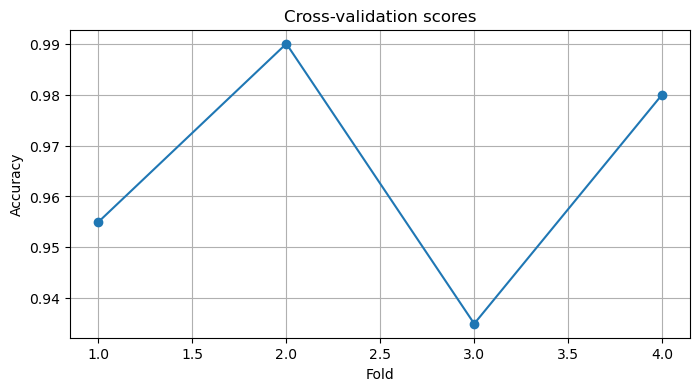

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_crossval_results(cv_scores):
    # Plot akurasi dari setiap lipatan
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-')
    plt.title('Cross-validation scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# Misalkan cv_scores adalah array dari skor cross-validation
# Plot hasil cross-validation
plot_crossval_results(cv_scores)


In [46]:
val_data = df[df["label"].isnull()] 

In [47]:
X_new = val_data["data_clean"]
X_new

1       ngerasa aplikasi palsu binomo turun drastis ri...
3       sampah jual harga tingi verifikasi jual harga ...
4                       cair ribu jt maksimal kerja lawak
6       verifikasi akun aju hapus akun ikut prosedur f...
10      pemeliharan rdn walet bosok isi cocok lihat kg...
                              ...                        
8230    suka aplikasi next adain beli emas dolar index...
8231    aplikasi manfatnya khilaf belanja uang rencana...
8232    salah aplikasi aperd layak dintal investasi fi...
8233    daftar masuk kode referal fareltolemba langsun...
8234    sumpah suka aplikasi bintang bicara kendala lo...
Name: data_clean, Length: 7235, dtype: object

In [48]:
X_new_counts = vectorizer.transform(X_new)
val_data['predicted_label'] = clf.predict(X_new_counts)

C:\Users\miase\AppData\Local\Temp\ipykernel_2244\3890003558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['predicted_label'] = clf.predict(X_new_counts)


In [49]:
val_data

,_id,at,data_clean,label,predicted_label
1,6638614cdd520c9ba22ee66d,2024-05-03 17:16:43,ngerasa aplikasi palsu binomo turun drastis ri...,NaN,1.0
3,6638614cdd520c9ba22ee66f,2024-05-03 07:50:00,sampah jual harga tingi verifikasi jual harga ...,NaN,1.0
4,6638614cdd520c9ba22ee670,2024-05-02 11:55:53,cair ribu jt maksimal kerja lawak,NaN,1.0
6,6638614cdd520c9ba22ee672,2024-05-01 18:36:42,verifikasi akun aju hapus akun ikut prosedur f...,NaN,1.0
10,6638614cdd520c9ba22ee676,2024-04-30 01:30:09,pemeliharan rdn walet bosok isi cocok lihat kg...,NaN,1.0
...,...,...,...,...,...
8230,663864e9dd520c9ba22f284a,2021-06-12 08:12:17,suka aplikasi next adain beli emas dolar index...,NaN,2.0
8231,663864e9dd520c9ba22f284b,2020-12-31 17:43:10,aplikasi manfatnya khilaf belanja uang rencana...,NaN,2.0
8232,663864e9dd520c9ba22f284c,2021-04-06 22:11:23,salah aplikasi aperd layak dintal investasi fi...,NaN,2.0
8233,663864e9dd520c9ba22f284d,2023-01-01 15:18:20,daftar masuk kode referal fareltolemba langsun...,NaN,2.0


In [50]:
# simpan ke file excel baru
val_data.to_excel("hasiltesting.xlsx", index=False)

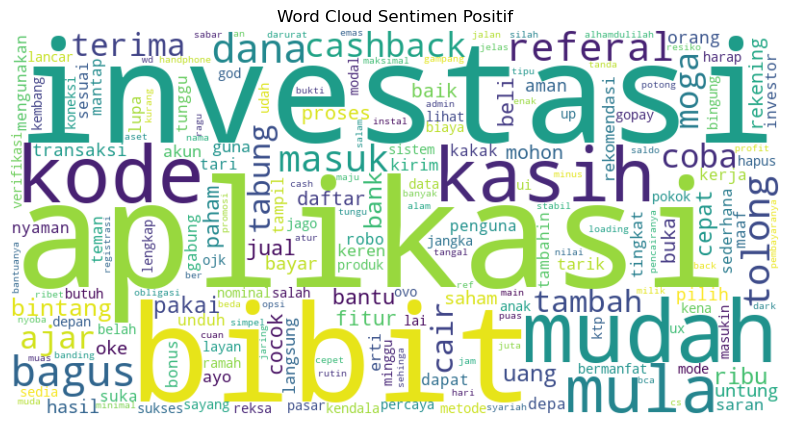

In [51]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['predicted_label'] == 2]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif')
plt.show()

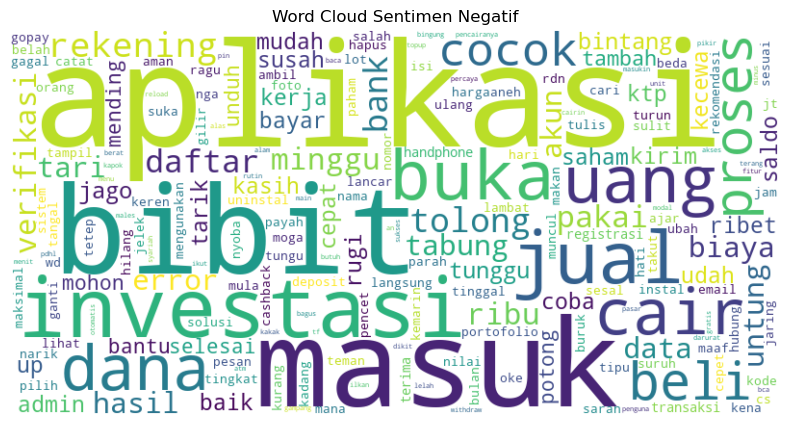

In [52]:
# Load the data for word cloud
wordcloud_data = pd.read_excel("hasiltesting.xlsx")

# Filter the data for label with value "1"
label_data = wordcloud_data[wordcloud_data['predicted_label'] == 1]

# Combine the labels into a single string
labels_text = ' '.join(label_data['data_clean'])

# Split the text into individual words
words = labels_text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Generate the word cloud with unique words
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif')
plt.show()

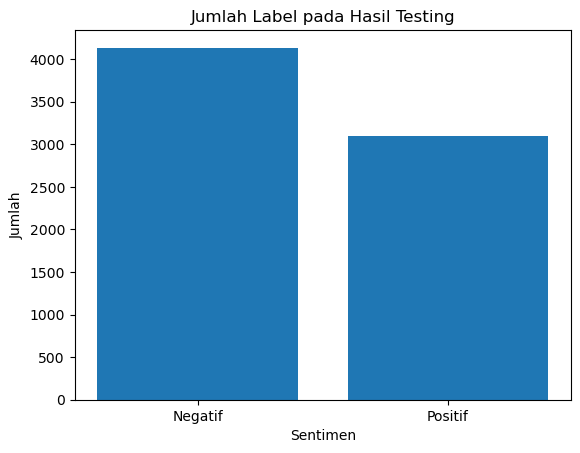

  Sentimen  Jumlah
0  Negatif    4133
1  Positif    3102


In [53]:
# Load the modified testing data
modified_data = pd.read_excel("hasiltesting.xlsx")

# Count the occurrences of each label
label_counts = modified_data["predicted_label"].value_counts()

# Extract the label values and their corresponding counts
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

# Map the label values to their corresponding sentiment
sentiment_map = {2: "Positif", 1: "Negatif"}
labels = [sentiment_map[label] for label in labels]

# Plot the bar chart
plt.bar(labels, counts)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.title("Jumlah Label pada Hasil Testing")
plt.show()

chart_data = pd.DataFrame({"Sentimen": labels, "Jumlah": counts})
print(chart_data)

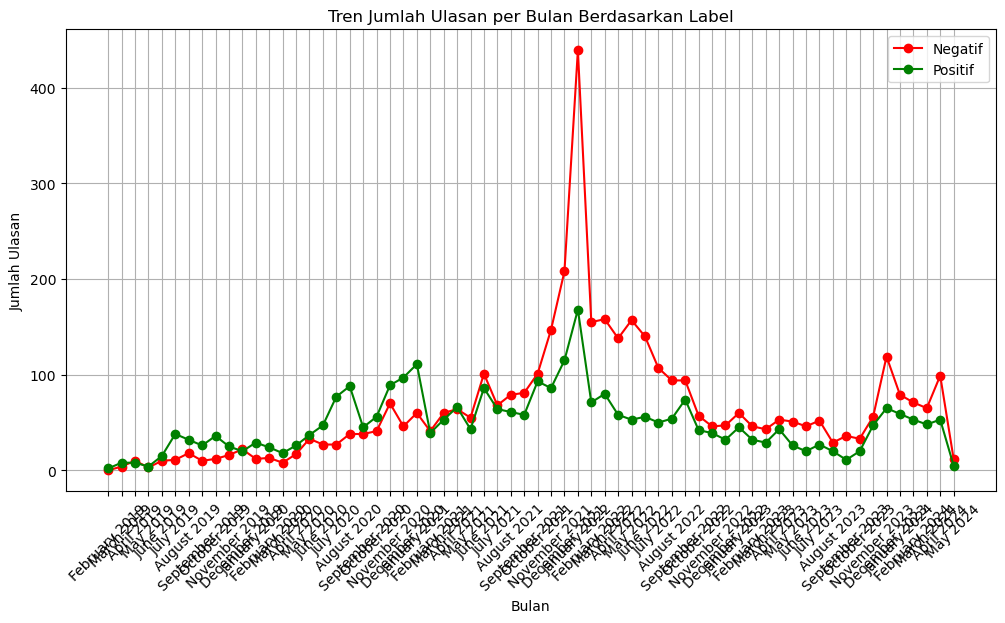

In [54]:
# Memuat data dari Excel file
df = pd.read_excel("hasiltesting.xlsx")

# Mengubah kolom "review_date" menjadi tipe data datetime
df['at'] = pd.to_datetime(df['at'])

# Mengatur kolom "review_date" sebagai indeks dataframe
df.set_index('at', inplace=True)

# Mengganti nilai label menjadi "Positif", "Netral", dan "Negatif"
label_mapping = {2: 'Positif', 1: 'Negatif'}
df['predicted_label'] = df['predicted_label'].map(label_mapping)

# Menghitung jumlah ulasan per bulan berdasarkan label
monthly_reviews = df.groupby([pd.Grouper(freq='M'), 'predicted_label']).size().unstack().fillna(0)

# Membuat line chart untuk tren jumlah ulasan per bulan berdasarkan label
plt.figure(figsize=(12, 6))
labels = ['Negatif', 'Positif']
colors = ['red',  'green']
x_values = range(len(monthly_reviews.index)) 
for i, (label, color) in enumerate(zip(labels, colors)):  # Menambahkan variabel i
    plt.plot(x_values, monthly_reviews[label], marker='o', label=label, color=color)  # Menggunakan x_values

plt.title('Tren Jumlah Ulasan per Bulan Berdasarkan Label')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Ulasan')

# Mengatur sumbu x dengan rentang bulan dan tahun yang sesuai
plt.xticks(x_values, [d.strftime('%B %Y') for d in monthly_reviews.index], rotation=45)  # Menggunakan x_values dan monthly_reviews.index

plt.legend()
plt.grid(True)
plt.show()